<a href="https://colab.research.google.com/github/dishant14/smoking-data-correlation-and-percentage-analysis/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
url='https://www.kaggle.com/datasets/mexwell/uk-smoking-data'
filename='smoking.csv'
df=pd.read_csv(filename)

In [4]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [6]:
df.dtypes

gender                    object
age                        int64
marital_status            object
highest_qualification     object
nationality               object
ethnicity                 object
gross_income              object
region                    object
smoke                     object
amt_weekends             float64
amt_weekdays             float64
type                      object
dtype: object

In [7]:
df.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


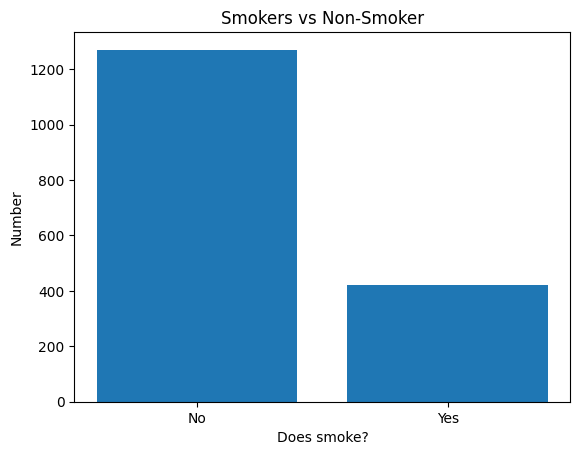

In [8]:
smoke_counts = df['smoke'].value_counts()

# Create a bar chart
plt.bar(smoke_counts.index, smoke_counts.values)
plt.xlabel('Does smoke?')
plt.ylabel('Number')
plt.title('Smokers vs Non-Smoker')
plt.show()

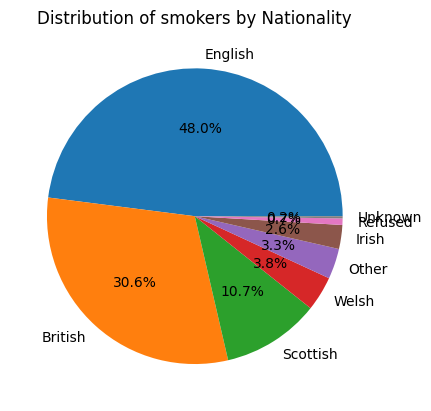

In [9]:
#pie chart

#count smokers
df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']
# print(smokers_data)

#count group by gender
nationality_count=smokers_data['nationality'].value_counts()
# print(gender_count)

plt.pie(nationality_count,labels=nationality_count.index,autopct='%1.1f%%')
plt.title('Distribution of smokers by Nationality')
plt.show()

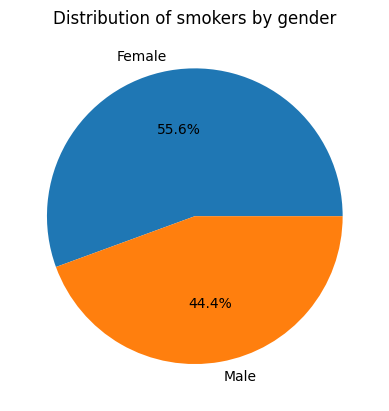

In [10]:
#pie chart

#count smokers
df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']
# print(smokers_data)

#count group by gender
gender_count=smokers_data['gender'].value_counts()
# print(gender_count)

plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
plt.title('Distribution of smokers by gender')
plt.show()

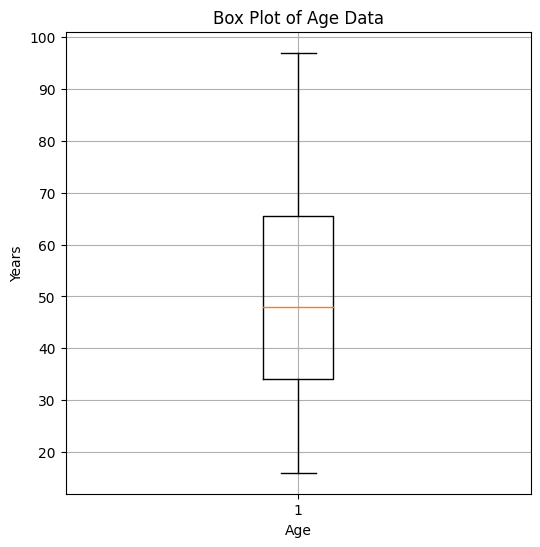

In [11]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Years')
plt.title('Box Plot of Age Data')
plt.grid(True)
plt.show()

In [13]:
import plotly.express as px

df['smoke'] = df['smoke'].str.lower().str.strip()
smokers_data = df[df['smoke'] == 'yes']

smokers_by_marital_status = smokers_data.groupby('marital_status').size().reset_index(name='count')

fig = px.bar(smokers_by_marital_status,x='marital_status',y='count',
             title='Contribution of Smokers by Marital Status',
             labels={'marital_status': 'Marital Status', 'count': 'Number of Smokers'})
fig.show()

